In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime
% matplotlib inline

In [100]:
cov = pd.read_csv("https://covidtracking.com/api/v1/us/daily.csv")
# today = pd.read_csv("https://covidtracking.com/api/v1/us/current.csv")
# cov = pd.concat([cov, today], axis=0)
cov['date'] = cov['date'].map(lambda x: datetime.strptime(str(x), '%Y%m%d'))
cov['date_plt'] = date2num(cov['date'].tolist())


In [101]:
stat = pd.read_csv("https://covidtracking.com/api/v1/states/daily.csv")
# remove ny
# collapse all states with group by (on date)
# graph
stat = stat[stat['state'] != 'NY'].copy()
stat['date'] = stat['date'].map(lambda x: datetime.strptime(str(x), '%Y%m%d'))
stat['date_plt'] = date2num(stat['date'].tolist())
stat = stat.groupby('date').sum()
stat.reset_index(inplace=True)

In [102]:
stat.head()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_plt
0,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737446.0
1,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737447.0
2,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737448.0
3,2020-01-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737449.0
4,2020-01-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737450.0


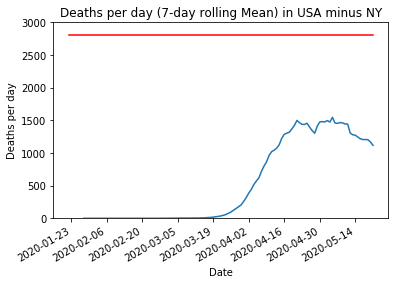

In [103]:
plt.plot(stat['date'], stat['deathIncrease'].rolling(7).mean())
plt.plot(stat['date'], [2800 for date in stat['date']], color='r')
plt.gcf().autofmt_xdate()
plt.title("Deaths per day (7-day rolling Mean) in USA minus NY")
plt.ylabel("Deaths per day")
plt.xlabel("Date")
plt.ylim((0,3000))
plt.show()

In [104]:
stat.head()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_plt
0,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737446.0
1,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737447.0
2,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737448.0
3,2020-01-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737449.0
4,2020-01-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,53,0.0,0.0,0.0,0.0,0.0,737450.0


In [105]:
cov.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_plt
0,2020-05-21,56,1567427,11482479.0,3641.0,39915.0,166254.0,9090.0,7412.0,4868.0,...,13053547,13049906,13049906,NaN,1513.0,4638.0,376997.0,25118.0,402115.0,737566.0
1,2020-05-20,56,1542309,11105482.0,2973.0,40884.0,161616.0,9829.0,7319.0,4911.0,...,12650764,12647791,12647791,NaN,1402.0,1982.0,391806.0,21531.0,413337.0,737565.0
2,2020-05-19,56,1520778,10713676.0,2944.0,41174.0,159634.0,9829.0,7217.0,5032.0,...,12237398,12234454,12234454,NaN,1430.0,1671.0,378228.0,21052.0,399280.0,737564.0
3,2020-05-18,56,1499726,10335448.0,3596.0,40933.0,157963.0,10015.0,7064.0,5257.0,...,11838770,11835174,11835174,NaN,786.0,1058.0,317486.0,19568.0,337054.0,737563.0
4,2020-05-17,56,1480158,10017962.0,3449.0,41108.0,156905.0,10164.0,7003.0,5467.0,...,11501569,11498120,11498120,NaN,839.0,1179.0,383999.0,20731.0,404730.0,737562.0


In [106]:
cov.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'date_plt'],
      dtype='object')

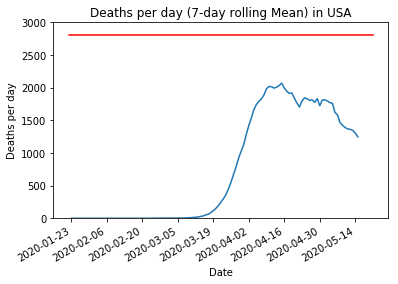

In [107]:
plt.plot(cov['date'], cov['deathIncrease'].rolling(7).mean())
plt.plot(cov['date'], [2800 for date in cov['date']], color='r')
plt.gcf().autofmt_xdate()
plt.title("Deaths per day (7-day rolling Mean) in USA")
plt.ylabel("Deaths per day")
plt.xlabel("Date")
plt.ylim((0,3000))
plt.show()

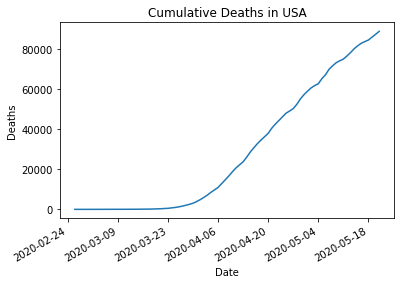

In [108]:
plt.plot(cov['date'], cov['death'])
# plt.plot(cov['date'], [2800 for date in cov['date']], color='r')
# plt.plot(cov['date'], [2800 for date in cov['date']], color='r')
plt.gcf().autofmt_xdate()
plt.title("Cumulative Deaths in USA")
plt.ylabel("Deaths")
plt.xlabel("Date")
plt.show()

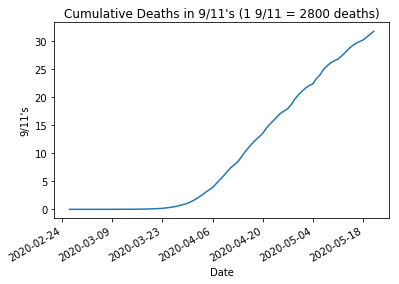

In [109]:
plt.plot(cov['date'], cov['death']/2800)
# plt.plot(cov['date'], [2800 for date in cov['date']], color='r')
# plt.plot(cov['date'], [2800 for date in cov['date']], color='r')
plt.gcf().autofmt_xdate()
plt.title("Cumulative Deaths in 9/11's (1 9/11 = 2800 deaths)")
plt.ylabel("9/11's")
plt.xlabel("Date")
# plt.ylim((0,3000))
plt.show()

# Excess deaths

In [82]:
pop = pd.read_csv("https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/source-data/united-states/united_states_states.csv", )
df = pd.read_csv("https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/source-data/united-states/united_states_total_source_latest.csv")

In [83]:

df.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%
1,State,Alabama,All,2019-20,41,3.9,0,37,941,96.9%
2,State,Alabama,All,2019-20,42,4.5,0,46,"1,012",> 100%
3,State,Alabama,All,2019-20,43,4.4,2,42,"1,000",> 100%
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%


In [85]:

df.groupby(['SEASON', 'WEEK']).sum().head().reset_index()

,SEASON,WEEK,PERCENT P&I
0,2012-13,1,564.0
1,2012-13,2,580.5
2,2012-13,3,596.1
3,2012-13,4,550.3
4,2012-13,5,534.8


In [52]:
"".join([char for char in '1234.4f' if char in '1234567890'])

'12344'

In [54]:
clean_numbers('123,0')

1230

In [26]:
nh = get_state_data("NH")

DF Shape for NH: (385, 13)


In [55]:
il = get_state_data("IL")

DF Shape for IL: (385, 13)


In [56]:
il.head()

,state_name,state_code,population,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,Illinois,IL,12671821,State,Illinois,All,2019-20,40,6.3,0,127,2021,99.2%
1,Illinois,IL,12671821,State,Illinois,All,2019-20,41,5.7,1,119,2105,> 100%
2,Illinois,IL,12671821,State,Illinois,All,2019-20,42,5.6,0,122,2184,> 100%
3,Illinois,IL,12671821,State,Illinois,All,2019-20,43,4.8,0,105,2190,> 100%
4,Illinois,IL,12671821,State,Illinois,All,2019-20,44,5.6,1,114,2070,> 100%


In [60]:
nh.dtypes

state_name               object
state_code               object
population                int64
AREA                     object
SUB AREA                 object
AGE GROUP                object
SEASON                   object
WEEK                      int64
PERCENT P&I             float64
NUM INFLUENZA DEATHS     object
NUM PNEUMONIA DEATHS     object
TOTAL DEATHS              int64
PERCENT COMPLETE         object
dtype: object

In [103]:
get_state_data('usa').head()

DF Shape for USA: (20020, 13)


,state_name,state_code,population,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,Alabama,AL,4903185,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%
1,Alabama,AL,4903185,State,Alabama,All,2019-20,41,3.9,0,37,941,96.9%
2,Alabama,AL,4903185,State,Alabama,All,2019-20,42,4.5,0,46,1012,> 100%
3,Alabama,AL,4903185,State,Alabama,All,2019-20,43,4.4,2,42,1000,> 100%
4,Alabama,AL,4903185,State,Alabama,All,2019-20,44,5.7,2,53,962,99%


In [119]:
def clean_numbers(x):
    temp = "".join([char for char in str(x) if char in '1234567890'])
    return int(temp) if temp else 0

def get_state_data(state):
    state = state.upper()
    pop = pd.read_csv("https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/source-data/united-states/united_states_states.csv", )
    if state != 'USA':
        pop = pop[pop['state_code'] == state]
    ed = pd.read_csv("https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/source-data/united-states/united_states_total_source_latest.csv")
    merged = pd.merge(left=pop, right=ed, left_on='state_name', right_on='SUB AREA', how='left')
    print("DF Shape for {state}: {shape}".format(state=state, shape=merged.shape))
    merged['TOTAL DEATHS'] = merged['TOTAL DEATHS'].map(clean_numbers)
#     print(merged.head())
    return merged

def plot_excess_deaths(state):
    state = state.upper()
    df = get_state_data(state)
    # plot against week
    # separate out each season individually
#     season_list = []
    if state == 'USA':
        df = df.groupby(['SEASON', 'WEEK']).sum().reset_index()
        state_name = 'USA'
    else:
        state_name = df['SUB AREA'].tolist()[0]
    average_deaths = df['TOTAL DEATHS'].mean()
#     print(average_deaths)
    for season in set(df['SEASON'].tolist()):
        temp = df[df['SEASON']==season].copy()
#         season_list.append(season)
        if season == '2019-20':
            color = 'r'
            alpha = 1
        else:
            color = 'b'
            alpha = .5
        plt.scatter(temp['WEEK'], temp['TOTAL DEATHS'].rolling(1).mean(), c=color, alpha=alpha)
#     plt.legend(season_list)
    plt.title('Excess Deaths for {} (2012-2020)'.format(state_name))
#     plt.subtitle("2019-2020 in red")
    plt.xlabel('Week of Year')
    plt.ylabel("Deaths per Week")
    plt.ylim((average_deaths*.7, df['TOTAL DEATHS'].max()*1.05))
    plt.show()

DF Shape for USA: (20020, 13)


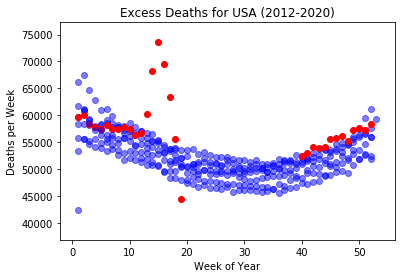

In [120]:
plot_excess_deaths('usa')

In [15]:
nh['SEASON'].value_counts()

2014-15    53
2015-16    52
2016-17    52
2017-18    52
2013-14    52
2018-19    52
2012-13    39
2019-20    33
Name: SEASON, dtype: int64

In [6]:
nh.head()

,state_name,state_code,population,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,New Hampshire,NH,1359711,State,New Hampshire,All,2019-20,40,6.0,0,14,234,> 100%
1,New Hampshire,NH,1359711,State,New Hampshire,All,2019-20,41,9.3,0,22,236,> 100%
2,New Hampshire,NH,1359711,State,New Hampshire,All,2019-20,42,5.5,0,14,254,> 100%
3,New Hampshire,NH,1359711,State,New Hampshire,All,2019-20,43,6.7,0,16,239,> 100%
4,New Hampshire,NH,1359711,State,New Hampshire,All,2019-20,44,4.8,0,12,252,> 100%


In [122]:
pop.head()

,state_name,state_code,population
0,Alabama,AL,4903185
1,Alaska,AK,731545
2,Arizona,AZ,7278717
3,Arkansas,AR,3017825
4,California,CA,39512223


In [124]:
df.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%
1,State,Alabama,All,2019-20,41,3.9,0,37,941,96.9%
2,State,Alabama,All,2019-20,42,4.5,0,46,"1,012",> 100%
3,State,Alabama,All,2019-20,43,4.4,2,42,"1,000",> 100%
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%


In [125]:
df.shape

(20020, 10)

In [127]:
df['SEASON'].value_counts()

2014-15    2756
2015-16    2704
2018-19    2704
2016-17    2704
2013-14    2704
2017-18    2704
2012-13    2028
2019-20    1716
Name: SEASON, dtype: int64

In [128]:
al = df[df['SUB AREA']=='Alabama']

In [129]:
al.shape

(385, 10)